In [465]:
import numpy as np

In [466]:
length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [467]:
import matplotlib.pyplot as plt

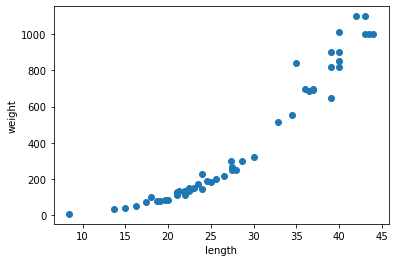

In [468]:
# 길이, 무게 구하기 (복습)
plt.scatter(length, weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 이전까지 학습용 데이터(train), 검증용 데이터(test)로 나누어 분류 모델을 이용했음
### - 최근접 이웃 분류법
# 값 예측 (회귀분석)
### - 최근접 이웃 예측법

In [469]:
# 회귀 : 길이가 몇일 때, 무게는 어느 정도일 것이라고 예상하는 것
# kneighbors regraition

In [470]:
# 훈련용 데이터(train), 검증용 데이터(test) 분류
from sklearn.model_selection import train_test_split

In [471]:
# train_test_split(length, weight, random_state=??) # for문 이용
# random_state : 매번 실행할 때마다 같은 값을 갖기 위함 (아무 값이나 넣어주면 됨)
# Htper-parameter tuning
# - for문을 이용하여 배열로 만든 후 평균제곱오차의 값이 가장 적을 때의 값을 출력하도록 만들어주면 유용

In [472]:
train, test, train_target, test_target = train_test_split(length, weight, random_state=42)

In [473]:
train.shape, test.shape

((42,), (14,))

In [474]:
# 2차원 만들어주기
test1 = np.array([1,2,3,4,5])
test1 = test1.reshape(-1,1) # -1은 행렬 자동 생성을 의미
test1.shape

(5, 1)

In [475]:
train = train.reshape(-1,1)
test = test.reshape(-1,1)

# 훈련 모델 - 회귀
### fit
### score - 점수
### predict

In [476]:
from sklearn.neighbors import KNeighborsRegressor # 예측

In [477]:
knr = KNeighborsRegressor()

In [478]:
knr.fit(train, train_target)

# ValueError: Expected 2D array, got 1D array instead:
# --> 2차원 형태여야 하는데, 1차원으로 입력하여 발생한 에러

KNeighborsRegressor()

In [479]:
knr.score(test,test_target)

0.992809406101064

In [480]:
test.shape

(14, 1)

In [481]:
test_target.shape

(14,)

### 학습용 데이터는 2D array 형태가 되어야 함 - reshape(-1, 1)

#### 평가 방법 : 결정계수 R**2 (R제곱)
##### - 평균제곱오차 
##### - 1 - (sum((타깃 - 예측) ** 2) / sum((타깃 - 평균) ** 2)

In [482]:
from sklearn.metrics import mean_absolute_error # 평균제곱오차 구하는 함수

### mean_absolute_error (실제값, 예측값)

In [483]:
test_predict = knr.predict(test)

In [484]:
mae = mean_absolute_error(test_target, test_predict) # 실제값과 예측값의 비율
mae

19.157142857142862

### 하이퍼 파라미터 튜닝
#### - 머신러닝에서 파라미터의 최적의 값을 찾는 과정을 의미

In [485]:
# for문을 이용한 평균제곱오차의 값을 10개 가량 구한 후 mae_list에 append,
# min(mae_list)값의 인덱스 번호로 최적의 파라미터 값 찾기

mae_list = []
parameters = {
    "random_state" : list(range(1000))
}
# for i in range(len(range(10,105,2))):
# 변수와 for문 range 범위가 자동으로 바뀌게 하려면 변수명을 적는 것이 좋음
for i in parameters["random_state"]:
#     print(parameters["random_state"][i])
    train, test, train_target, test_target = train_test_split(length, weight, random_state=parameters["random_state"][i])
    knr = KNeighborsRegressor()
    train = train.reshape(-1,1)
    test = test.reshape(-1,1)
    knr.fit(train, train_target) # 학습
    test_predict = knr.predict(test) # 예측
    # 평균제곱오차
    mae_list.append(mean_absolute_error(test_target, test_predict)) # 정답, 예측값
    
# mae_list

In [486]:
# 최소값 찾고 최소값에 해당하는 index 번호 찾아, 그 index 번호를 가지고 --> find_idxs
# paramerters["random_state"][find_idx]
# 최적의 random_state 값 found

In [487]:
random_state_min = np.min(mae_list)
random_state_min

10.857142857142858

In [488]:
# 최소값 반환
find_idx = mae_list.index(random_state_min)
find_idx

131

In [489]:
parameters["random_state"][find_idx]

131

In [490]:
knr.score(test, test_predict)

1.0

## 과적합(overfit) = 과대적합 + 과소적합

In [491]:
knr = KNeighborsRegressor()

# 임의의 x좌표 생성
x = np.arange(5, 45).reshape(-1,1)

### n_neighbors의 개수를 1, 5, 10일 때 비교해보기

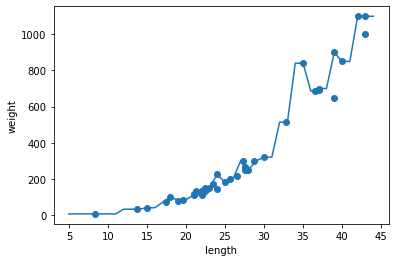

In [492]:
knr.n_neighbors = 1 # 이웃 : 1 --> 그룹 : 1 로 값을 예측한 것
                    # 이웃의 개수를 과적합 가능성 높음
knr.fit(train, train_target)
prediction = knr.predict(x)
plt.scatter(train, train_target) # 예측값 점으로 표시
plt.plot(x, prediction) # 예측값 선으로 표시
plt.xlabel('length')
plt.ylabel('weight')
plt.show() # 훈련용 실제 데이터 출력

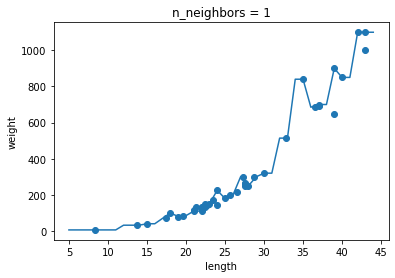

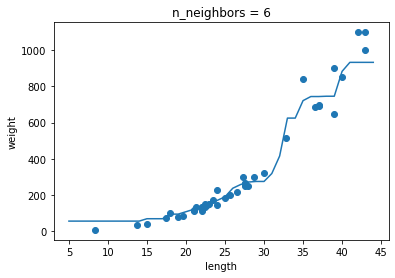

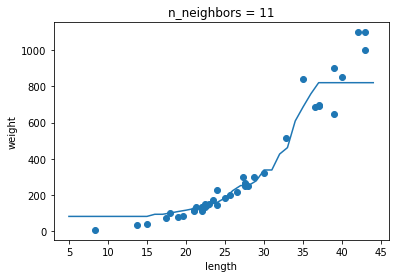

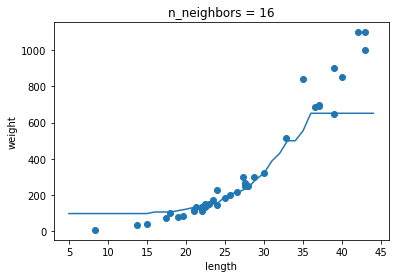

In [493]:
# 과적합과 비교해 보기 

for i in range(1, 20, 5):
    knr.n_neighbors = i
    knr.fit(train, train_target)
    prediction = knr.predict(x)
    plt.scatter(train, train_target)
    plt.plot(x, prediction)
    
    plt.title(f"n_neighbors = {i}")
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

# 1 OR 2가 제일 적합한 것을 알 수 있음
# 군집을 정교화 할수록 과적합 됨

In [494]:
# 정렬하기 (선 매끄럽게)
temp = test # np.array 2차원을 복사
temp.reshape(-1) # 1차원 배열로 변환
temp.sort() # 1차원 리스트 --> 오름차순 정렬
temp.reshape(-1,1) # 정렬된 데이터 --> 2차원 배열로 변환
# 정렬이 안되면 그래프가 뒤죽박죽으로 나옴

array([[21. ],
       [24.6],
       [34.5],
       [20. ],
       [40. ],
       [36. ],
       [40. ],
       [40. ],
       [44. ],
       [43.5],
       [39. ],
       [16.2],
       [18.7],
       [22. ]])

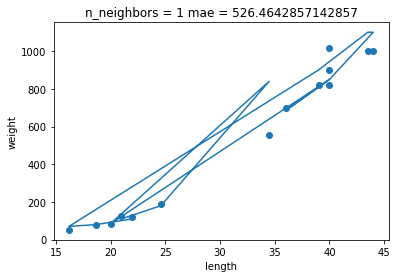

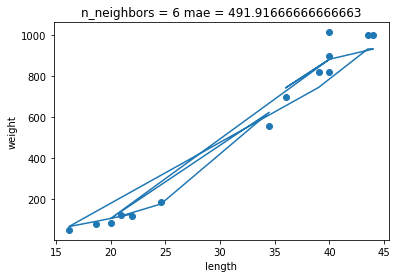

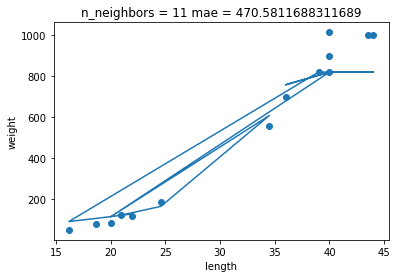

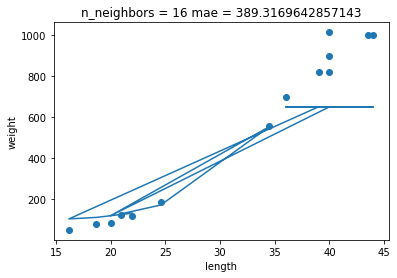

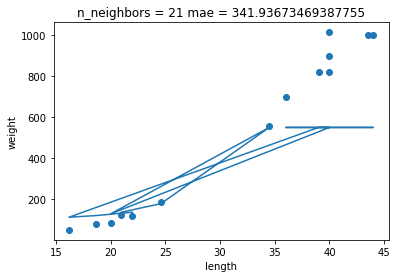

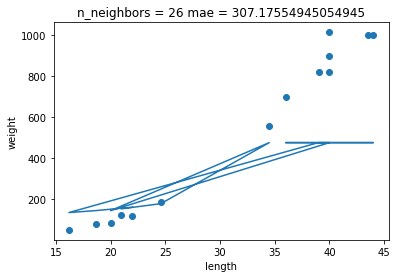

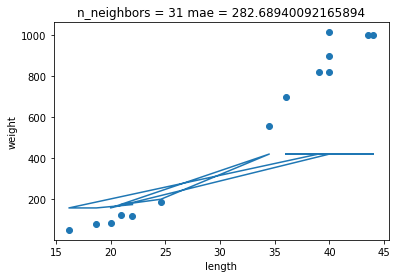

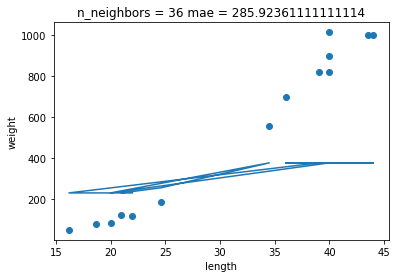

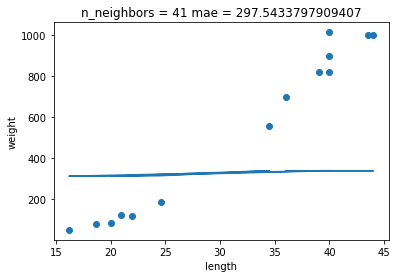

In [495]:
for i in range(1, 45, 5):
    knr.n_neighbors = i
    knr.fit(train, train_target) # 훈련용 데이터로 학습한 것을
    prediction = knr.predict(temp) # 검증용(test) 데이터로 예측하고
    plt.scatter(test, test_target) # 실제 검증용 데이터를 좌표에 출력

    plt.plot(temp, prediction) # 검증용 데이터의 예측값 점으로 표시
    mae = mean_absolute_error(temp, prediction) # 평가값 확인
    
    plt.title(f"n_neighbors = {i} mae = {mae}")
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()